## Intro Activities 

First task: 

Load the dataset from FranksNumbers.txt and calculate the mean and standard deviation for each dataset. 


In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# load in the dataset

# load in the dataset
data = open('FranksNumbers.txt', 'r')
all_data = data.read()

# remove the header
all_data = all_data.split('Multiple Data Sets of X and Y points\n')[1]
# split the data by the data set number
all_data = all_data.split('Data set ')

# store the data in a dictionary
data_dict = {}
for data in all_data: 
    data = data.split('\n')
    if len(data) > 1: 
        data_label = data.pop(0)
        data = data[1:]
        data_set_n = []
        for sample in data: 
            sample = sample.split('\t')
            for i in range(len(sample)):
                try: 
                    sample[i] = float(sample[i])
                    data_set_n.append(sample)
                except:
                    continue
            
        data_dict[data_label] = np.array(data_set_n)

In [55]:
# create functions to calculate the mean and standard deviation

def calc_mean(data): 
    mean = np.sum(data)/len(data)   
    return mean

def calc_variance(data): 
    mean = calc_mean(data)
    var = np.sum((data - mean)**2)/(len(data)-1)
    return var  

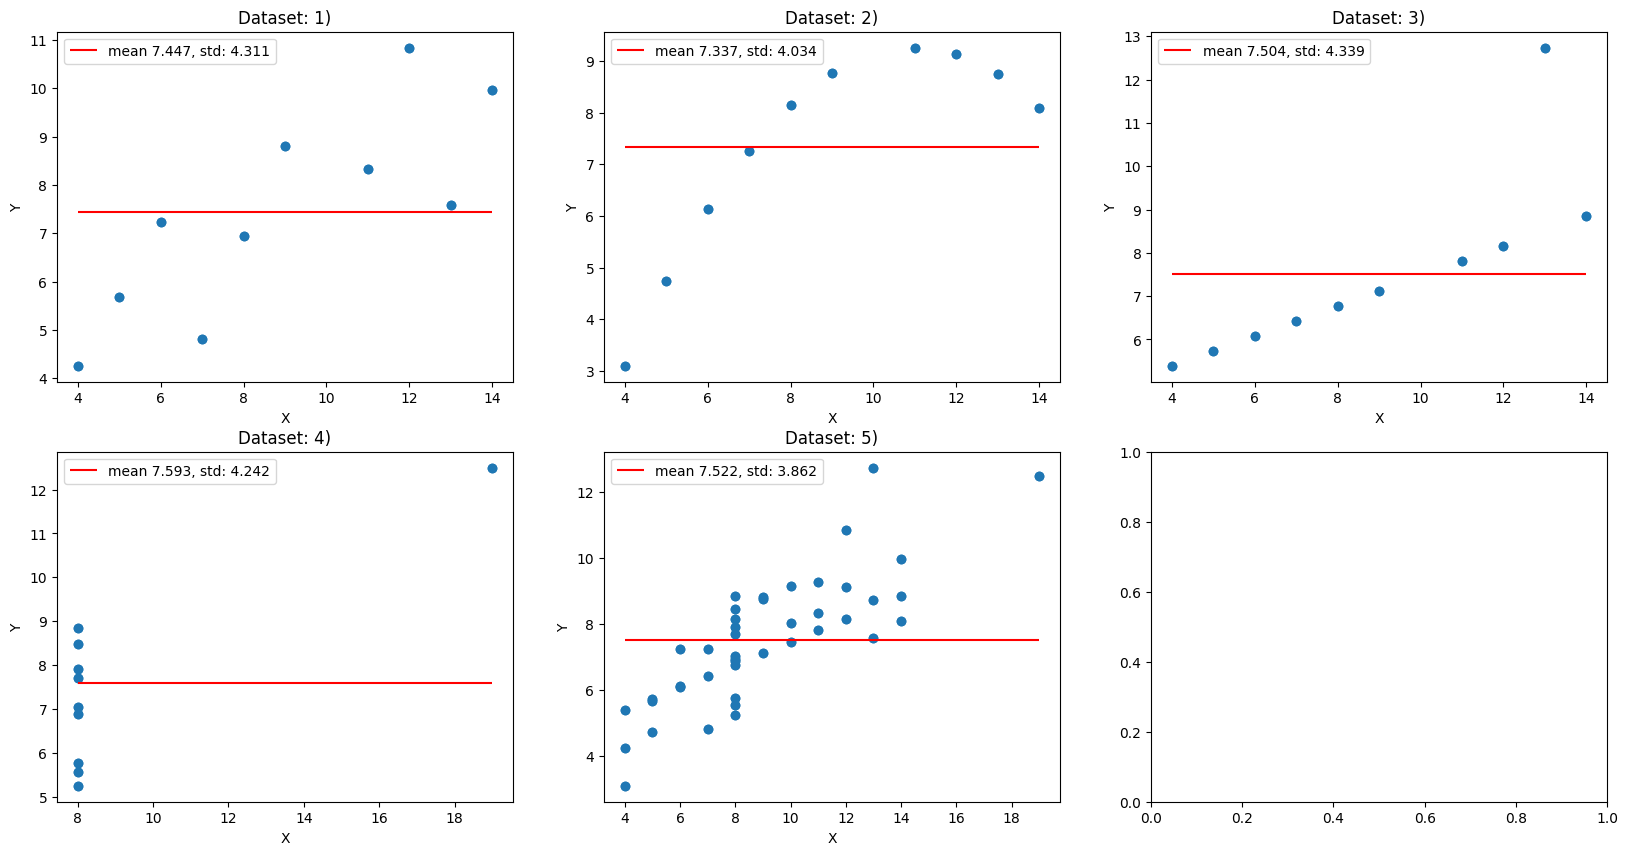

In [56]:
fig, axs = plt.subplots(2, 3, figsize=(2*10,10))

data_keys = list(data_dict.keys())
for j, ax in enumerate(axs.flatten()):
    try: 
        i = data_keys[j]
        data = data_dict[i]
        df = pd.DataFrame(data, columns = ['X', 'Y'])
        ax.scatter(df['X'], df['Y'])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title(f"Dataset: {str(i)})")# \n mean: {np.round(np.mean(df['Y']),3)} std: {np.round(np.std(df['Y']),3)}") 
        var = calc_variance(df['Y'])
        mean = calc_mean(df['Y'])
        ax.hlines(np.mean(df['Y']), min(df['X']), max(df['X']), color = 'red', label = f'mean {np.round(mean,3)}, std: {np.round(var,3)}')
        ax.legend()
    except: 
        continue

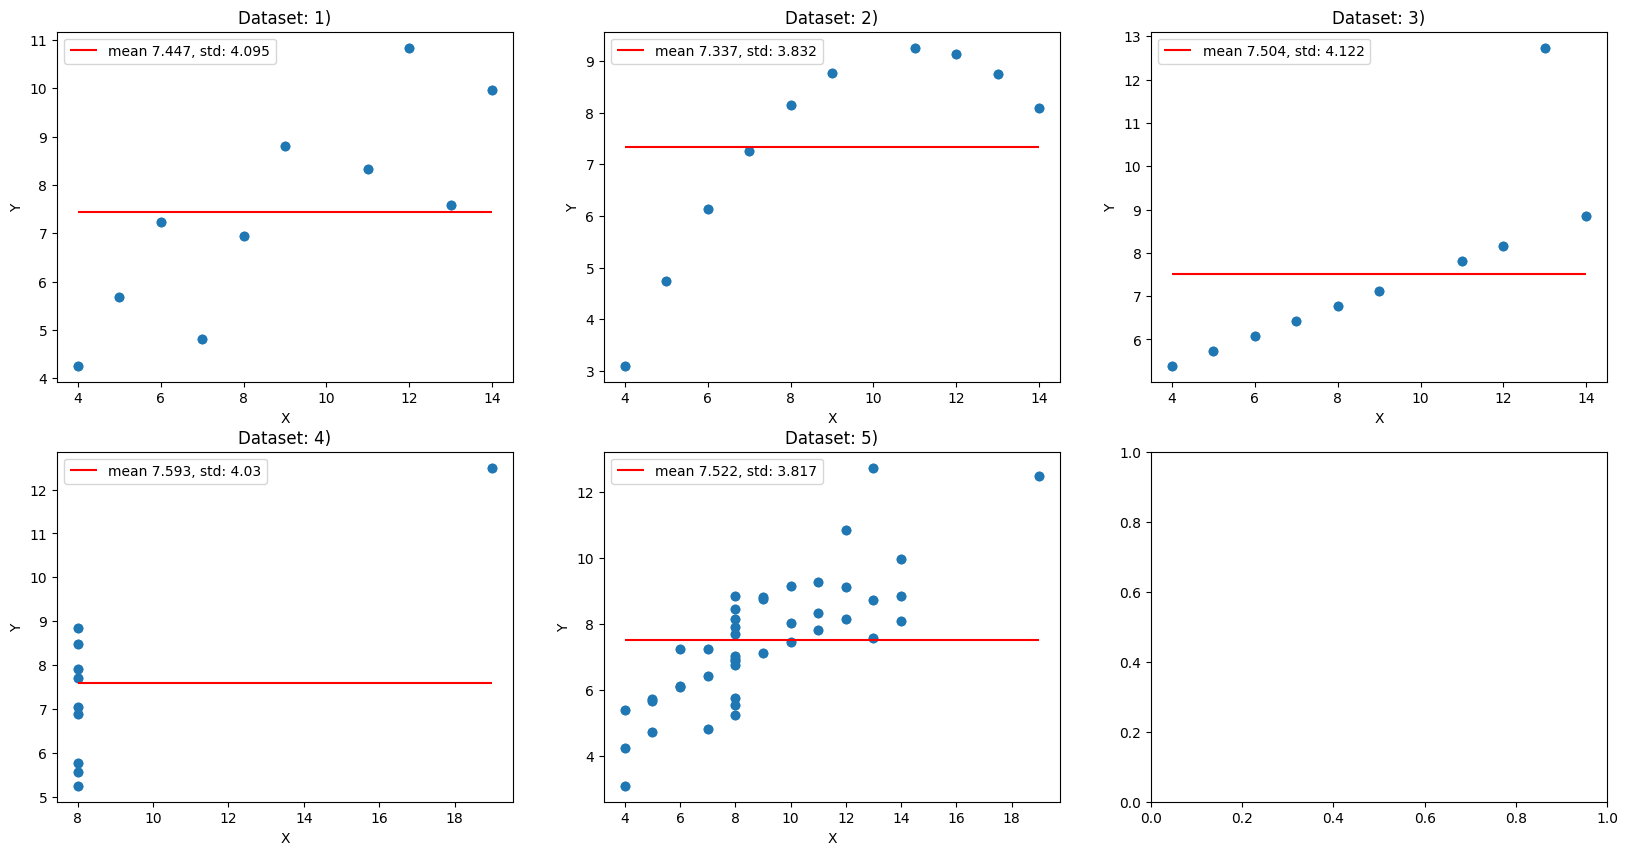

In [57]:
fig, axs = plt.subplots(2, 3, figsize=(2*10,10))

data_keys = list(data_dict.keys())
for j, ax in enumerate(axs.flatten()):
    try: 
        i = data_keys[j]
        data = data_dict[i]
        df = pd.DataFrame(data, columns = ['X', 'Y'])
        ax.scatter(df['X'], df['Y'])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title(f"Dataset: {str(i)})")# \n mean: {np.round(np.mean(df['Y']),3)} std: {np.round(np.std(df['Y']),3)}") 
        ax.hlines(np.mean(df['Y']), min(df['X']), max(df['X']), color = 'red', label = f'mean {np.round(np.mean(df["Y"]),3)}, std: {np.round(np.std(df["Y"])**2,3)}')
        ax.legend()
    except: 
        continue



Now, calculate the chi-squared according to the line $y = x*0.48 + 3.02$

1. Assume the uncertainty on the data is the square root of the y value. 
2. Assume the uncertainty on each data point if pm 1.22
3. Decide which one gives a better descritpion. 

An error occurred: list index out of range


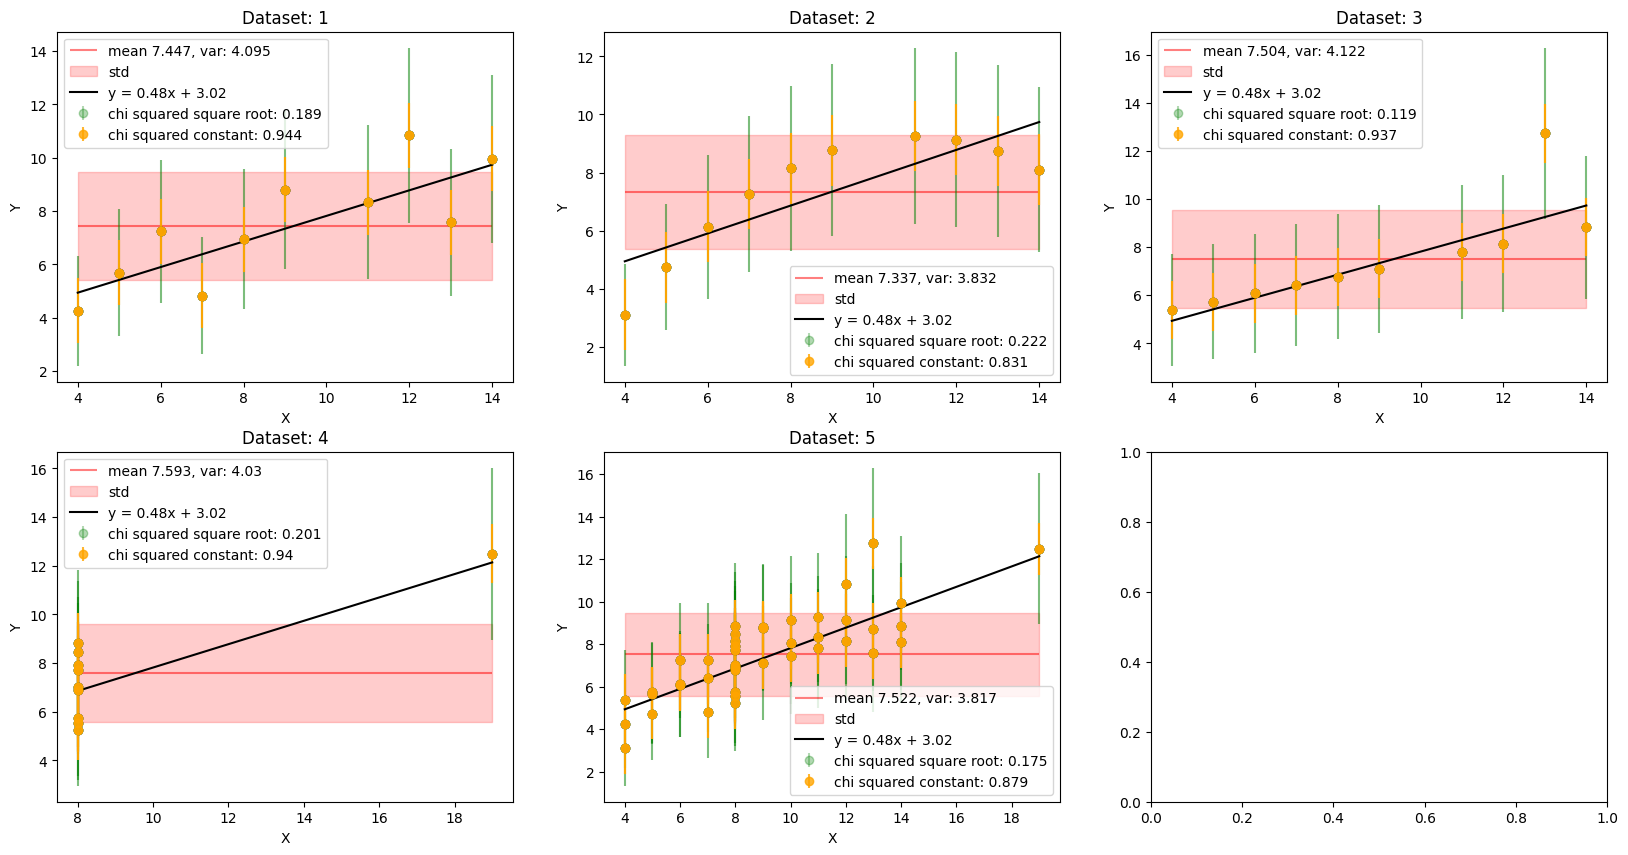

In [88]:
a = 0.48 
b = 3.02
fit_func = lambda x: a*x + b

# calculate the chi squared value
def calc_chi_squared(data, fit_func, uncertainty_type): 
    chi_squared = 0
    uncertainties = []
    for data_x, data_y in data: 
        if uncertainty_type == 'square_root_y': 
            uncertainty  = np.sqrt(data_y)
        elif uncertainty_type == 'constant':
            uncertainty = 1.22

        # calculate the uncertainty
        chi_squared_i = ((data_y- fit_func(data_x))**2)/(uncertainty**2)
        chi_squared += chi_squared_i
        uncertainties.append(uncertainty)
    red_chi_squared = chi_squared/(len(data))
    return red_chi_squared, uncertainties

for i in data_keys: 
    data = data_dict[i]
    df = pd.DataFrame(data, columns = ['X', 'Y'])
    chi_squared_constant, uncertainties_constant = calc_chi_squared(data, fit_func, 'constant')
    chi_squared_square_root, uncertainties_square_root = calc_chi_squared(data, fit_func, 'square_root_y')

fig, axs = plt.subplots(2, 3, figsize=(2*10,10))

data_keys = list(data_dict.keys())
for j, ax in enumerate(axs.flatten()):
    try: 
        i = data_keys[j]
        data = data_dict[i]
        df = pd.DataFrame(data, columns=['X', 'Y'])
        ax.scatter(df['X'], df['Y'])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title(f"Dataset: {str(i)}")

        # Plot mean line
        ax.hlines(np.mean(df['Y']), min(df['X']), max(df['X']), color='red', 
                  label=f'mean {np.round(np.mean(df["Y"]), 3)}, var: {np.round(np.std(df["Y"])**2, 3)}', alpha=0.5)
        # plot the rectangle representing the standard deviation
        ax.fill_between([min(df['X']), max(df['X'])], np.mean(df['Y']) - np.std(df['Y']), np.mean(df['Y']) + np.std(df['Y']), color='red', alpha=0.2, label = 'std')

        # Calculate chi-squared values and uncertainties
        chi_squared_constant, uncertainties_constant = calc_chi_squared(data, fit_func, 'constant')
        chi_squared_square_root, uncertainties_square_root = calc_chi_squared(data, fit_func, 'square_root_y')

        # Plot error bars with scatter points
        ax.errorbar(x=df['X'].values, y=df['Y'].values, yerr=uncertainties_square_root, fmt='o', alpha=0.3,color = "green",
                    label=f'chi squared square root: {np.round(chi_squared_square_root, 3)}')

        ax.errorbar(x=df['X'].values, y=df['Y'].values, yerr=uncertainties_constant, fmt='o', alpha=0.8,color = "orange",
                    label=f'chi squared constant: {np.round(chi_squared_constant, 3)}')

        # add the line that we are trying to fit to: 
        x = np.linspace(min(df['X']), max(df['X']), 100)
        y = fit_func(x)
        ax.plot(x, y, color='black', label=f'y = {a}x + {b}')
        ax.legend()
    except Exception as e:
        print(f"An error occurred: {e}")
        continue


**SUPER IMPORTANT NOTE**

We can not assign statistical uncertainties based on the chi-squared values that we fit to the model. 

Because we can change the types on uncertainties that we assume, and these choices will impact the final chi-squared values. 